In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Sigmoid Function

In [2]:
def sigmoid(z):
  """
  Sigmoid Function: σ(z) = 1 / (1 + e^(-z))
  Maps any real value to the (0,1) range
  """

  return 1 / (1 + np.exp(-z))

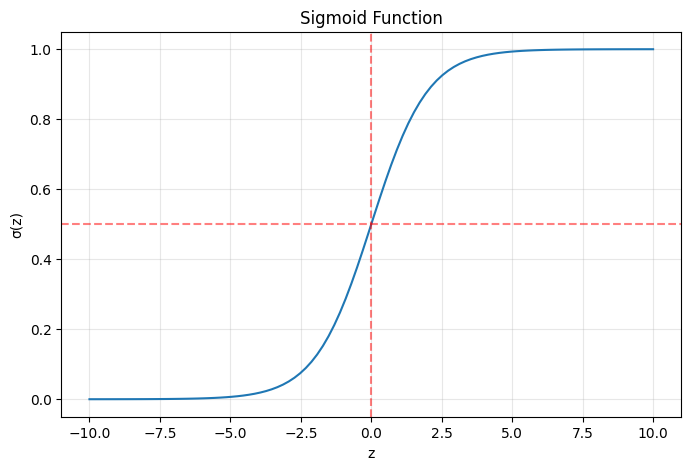

In [3]:
# Visualization
z = np.linspace(-10,10,100) # 100 evenly spaced points between -10 and 10
plt.figure(figsize=(8,5))
plt.plot(z,sigmoid(z))
plt.grid(True, alpha=0.3) # alpha is the transparency
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.title("Sigmoid Function")
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5) # Adding horizontal line
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5) # Adding vertical line
plt.show()

### Testing the property: 1 - σ(x) = σ(-x)

In [4]:
x = 3.14168
print(f"1 - σ({x}) = {1 - sigmoid(x):.6f}")
print(f"σ(-{x}) = {sigmoid(-x):.6f}")
print(f"Property holds: {np.isclose(1 - sigmoid(x), sigmoid(-x))}")  # Check if values are approximately equal

1 - σ(3.14168) = 0.041420
σ(-3.14168) = 0.041420
Property holds: True


##Sentiment Classification Example

In [5]:
class LogisticRegression:
  def __init__(self, n_features):
    """ Initializing weights and bias to zero""" ### In LogReg we initialize to 0 usually, but in deep learning to randomly close to 0 values breaking simmetry (if all weights started at zero, neurons would learn the same features)
    self.w = np.zeros(n_features)
    self.b = 0

  def predict_proba(self,x):
    """
    Compute P(y=1|x) with logistic regression
    x: feature vector
    """

    z = np.dot(self.w, x) + self.b # Linear combination: wx + b
    return(sigmoid(z))

  def predict(self,x):
    """Make binary the prediction using a .5 threshold"""
    return 1 if self.predict_proba(x) > 0.5 else 0

  def __call__(self):
    return("Logistic Regression Model with Weights: ", self.w, "Intercept:", self.b)

In [6]:
# Example from the book (sentiment analysis features)
features = {
    'positive_words': 3,      # Count of positive sentiment words
    'negative_words': 2,      # Count of negative sentiment words
    'has_no': 1,             # Binary: contains word "no"
    'pronouns': 3,           # Count of 1st/2nd person pronouns
    'has_exclamation': 0,    # Binary: contains "!"
    'log_word_count': 4.19   # Log of document length
}

# Converting dic to numpy array (order matters)
x = np.array([features['positive_words'],
              features['negative_words'],
              features['has_no'],
              features['pronouns'],
              features['has_exclamation'],
              features['log_word_count']
])

# Creating model with weights from the book
model = LogisticRegression(n_features=6)
model.w = np.array([2.5, -5.0, -1.2, 0.5, 2.0, 0.7])  # Learned weights from the book
model.b = 0.1

print(model())

# Calculate probabilities
prob_positive = model.predict_proba(x)
prob_negative = 1 - prob_positive

print(f"Feature vector x: {x}")
print(f"Weights w: {model.w}")
print(f"Bias b: {model.b}")
print(f"z = w·x + b = {np.dot(model.w, x) + model.b:.3f}")
print(f"P(positive|x) = {prob_positive:.2f}")
print(f"P(negative|x) = {prob_negative:.2f}")
print(f"Prediction: {'positive' if model.predict(x) == 1 else 'negative'}")


('Logistic Regression Model with Weights: ', array([ 2.5, -5. , -1.2,  0.5,  2. ,  0.7]), 'Intercept:', 0.1)
Feature vector x: [3.   2.   1.   3.   0.   4.19]
Weights w: [ 2.5 -5.  -1.2  0.5  2.   0.7]
Bias b: 0.1
z = w·x + b = 0.833
P(positive|x) = 0.70
P(negative|x) = 0.30
Prediction: positive


##Softmax Function for Multinomial Classification

In [7]:
def softmax(z):
  """
  Softmax Function for a vector z
  softmax(z_i) = exp(z_i) / Σ_j exp(z_j)
  """
  # Applying normalization to the vector to avoid overflow
  exp_z = np.exp(z - np.max(z)) # Substracting the top value to apply later a np.exp and use the ratios instead
  return (exp_z / np.sum(exp_z) ) # Relative distances stay the same



Input z: [ 0.6  1.1 -1.5  1.2  3.2 -1.1]
Softmax output: [0.05 0.09 0.01 0.1  0.74 0.01]
Sum of probabilities: 0.9999999999999999
z_matrix[:3]
[[-5.         0.         0.       ]
 [-4.8989899  0.         0.       ]
 [-4.7979798  0.         0.       ]]
probs[:3]:
[[0.00335766 0.49832117 0.49832117]
 [0.00371321 0.49814339 0.49814339]
 [0.00410626 0.49794687 0.49794687]]


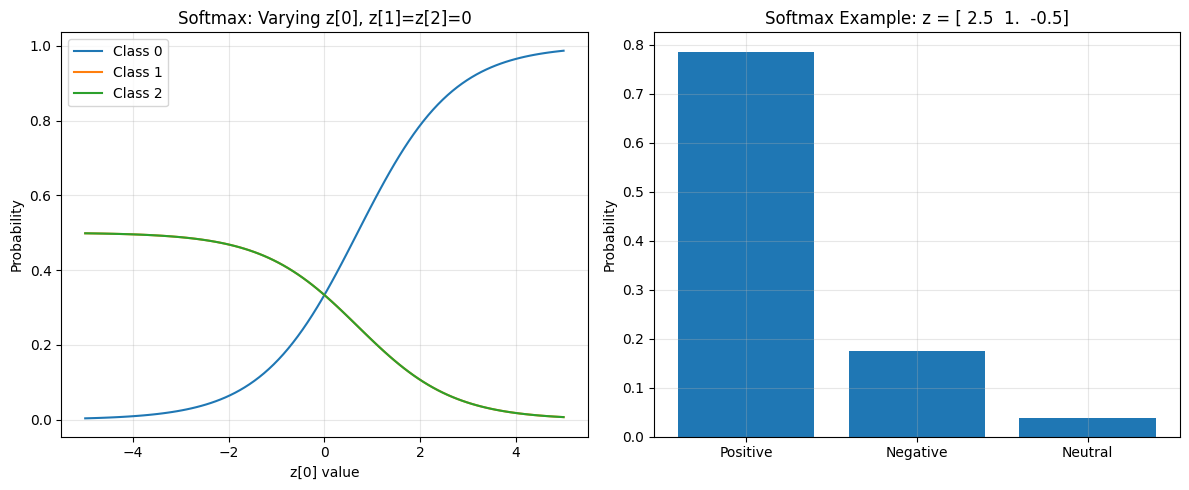

In [8]:
# Example from the textbook
z = np.array([0.6, 1.1, -1.5, 1.2, 3.2, -1.1])  # Raw scores (logits) for 6 classes
probabilities = softmax(z)

print("Input z:", z)
print("Softmax output:", np.round(probabilities, 2))
print("Sum of probabilities:", np.sum(probabilities))



### Visualization for 3 classes: both variable values and static
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

### ax1 left plot: one input variates the rest stay fixed
z_values = np.linspace(-5, 5, 100)

# Matix like [z_value, 0,0]
z_matrix = np.array([z_values, np.zeros_like(z_values), np.zeros_like(z_values)]).T
print("z_matrix[:3]")
print(z_matrix[:3])

probs = np.array([softmax(z_row) for z_row in z_matrix])
print("probs[:3]:")
print(probs[:3])

ax1.plot(z_values, probs[:,0], label= "Class 0")
ax1.plot(z_values, probs[:,1], label= "Class 1")
ax1.plot(z_values, probs[:,2], label= "Class 2")

ax1.set_xlabel('z[0] value')
ax1.set_ylabel('Probability')
ax1.set_title('Softmax: Varying z[0], z[1]=z[2]=0')
ax1.legend()
ax1.grid(True, alpha=0.3)


### ax2 right plot of constant logitss
classes = ['Positive', 'Negative', 'Neutral']
example_z = np.array([2.5, 1.0, -0.5])  # Logits for 3-way sentiment
example_probs = softmax(example_z)

ax2.bar(classes, example_probs)
ax2.set_ylabel('Probability')
ax2.set_title(f'Softmax Example: z = {example_z}')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Cross-Entropy Loss Function


In [9]:
def cross_entropy_loss(y_true, y_pred):
  """
  Binary Cross-Entropy loss
  When y=1: only first term matters, when y=0: only second term matters
  L = -[       y * (log(ŷ) )     +     ( (1-y) * log(1-ŷ)     )]
  """

  epsilon = 1e-15 # for preventing log(0), which outputs as undefined
  y_pred = np.clip(y_pred, epsilon, 1 -epsilon) # limitting the value so it is defined


  return -(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))



## Example from the book

Model prediction: 0.7
Loss when true label is positive (y=1): 0.3567
Loss when true label is negative (y=0): 1.2040


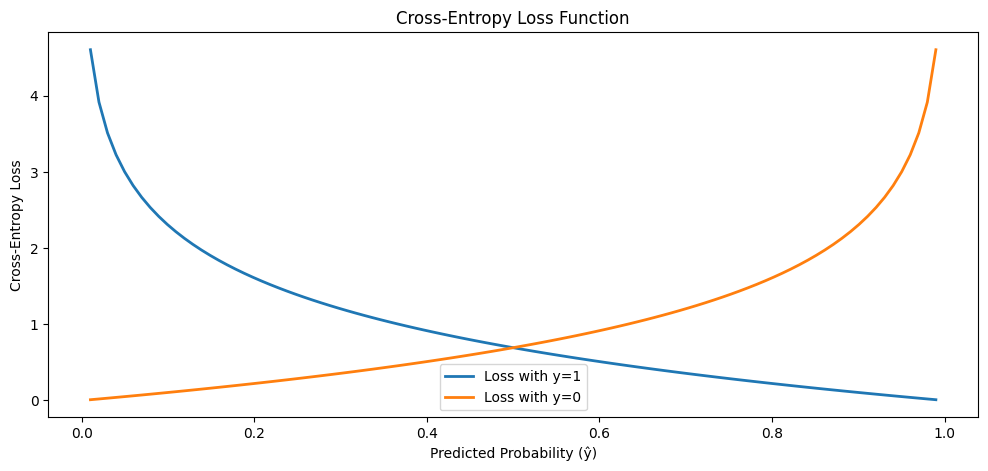

In [10]:
y_pred = 0.7
y_true_positive = 1 # + sentiment
y_true_negative = 0 # - sentiment

loss_correct = cross_entropy_loss(y_true_positive, y_pred) # Loss when prediction is correct
loss_incorrect = cross_entropy_loss(y_true_negative, y_pred) # Loss when prediction is incorrect

print(f"Model prediction: {y_pred}")
print(f"Loss when true label is positive (y=1): {loss_correct:.4f}")
print(f"Loss when true label is negative (y=0): {loss_incorrect:.4f}")

### Vis

y_pred_range = np.linspace(0.01, 0.99, 100)  # Avoid 0 and 1 for numerical stability, log(0) not def
loss_when_y1 = cross_entropy_loss(1, y_pred_range)  # Loss curve when true label is 1
loss_when_y0 = cross_entropy_loss(0, y_pred_range)  # Loss curve when true label is 0


plt.figure(figsize=(12,5))

plt.xlabel('Predicted Probability (ŷ)')
plt.ylabel('Cross-Entropy Loss')


plt.plot(y_pred_range, loss_when_y1, label="Loss with y=1", linewidth=2)
plt.plot(y_pred_range, loss_when_y0, label="Loss with y=0", linewidth=2)



plt.title('Cross-Entropy Loss Function')
plt.legend()

plt.show()

## Gradient Descent

In [36]:
class LogisticRegressionWithGD:
  def __init__(self, n_features, learning_rate=0.1):
    self.w = np.zeros(n_features)
    self.b = 0
    self.learning_rate = learning_rate
    self.losses = []

  def forward(self, X):
    """Compute predictions for batch X"""
    z = np.dot(X, self.w) + self.b
    return sigmoid(z) # applying sigmoid element-wise

  def compute_loss(self, X, y):
    """Compute average cross-entropy loss over batch"""
    m = len(y) # num of examples
    y_pred = self.forward(X)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1-epsilon)

    # Average loss: (1/m) * Σ[y*log(ŷ) + (1-y)*log(1-ŷ)]
    loss = -(1/m) * np.sum( y*np.log(y_pred) + (1-y) * np.log(1-y_pred) )
    return(loss)

  def compute_gradients(self, X, y):
    """Compute gradients using vectorized operations."""
    m = len(y) # Batch size
    y_pred = self.forward(X) # predictions

    # Gradient of weights: (1/m) * (ŷ - y)ᵀ X
    # Shape: (n_features,) = (m,) @ (m, n_features)
    dw = (1/m) *  np.dot((y_pred-y), X)

    # Gradient of bias: (1/m) * Σ(ŷ - y)
    db = (1/m) * np.sum(y_pred-y)

    print( "dw:", dw, "db: ", db)
    return( dw,db)



  def train_step(self, X, y):
    """One step of gradient descent"""

    # Calc gradients
    dw,db = self.compute_gradients(X,y)

    # Update params in opposite direction to gradients
    self.w -= self.learning_rate * dw
    self.b -= self.learning_rate * db

    # Track loss
    loss = self.compute_loss(X, y)
    self.losses.append(loss)

    return loss




Vertical Stack:  [[-1.00328585 -1.6382643 ]
 [-0.85231146  0.02302986]
 [-1.73415337 -1.73413696]
 [ 0.07921282 -0.73256527]
 [-1.96947439 -0.95743996]] 
... [[2.30040953 2.25429133]
 [2.68891337 2.20830385]
 [1.85144821 2.57015024]
 [1.47347874 0.61812535]
 [1.33693304 0.75509736]]
Horizontal Stack:  [0. 0. 0. 0. 0.] ... [1. 1. 1. 1. 1.]
X:  [[ 2.52406253  2.09252695]
 [ 3.16125921  1.04290374]
 [-3.10748323 -1.31536614]
 [ 2.57600714  1.52131165]
 [-2.25635075 -2.92225371]] ... [[-3.58192941  0.19645637]
 [-0.97805843 -1.20301533]
 [-1.5376347  -0.39669812]
 [ 0.52834327  0.12038184]
 [ 0.07957215 -2.02286003]]
y:  [1. 1. 0. 1. 0.] ... [0. 0. 0. 1. 0.]
dw: [-0.76479247 -0.76095962] db:  0.0


Epoch 0, Loss: 0.5849
Current weights: [0.07647925 0.07609596]
Current bias: 0.0


dw: [-0.65895686 -0.65362708] db:  0.0016837315570010052
dw: [-0.57191742 -0.5654404 ] db:  0.002942153744135692
dw: [-0.5017045  -0.49438846] db:  0.0038156782600207643
dw: [-0.44514199 -0.4372259 ] db:  0.004393

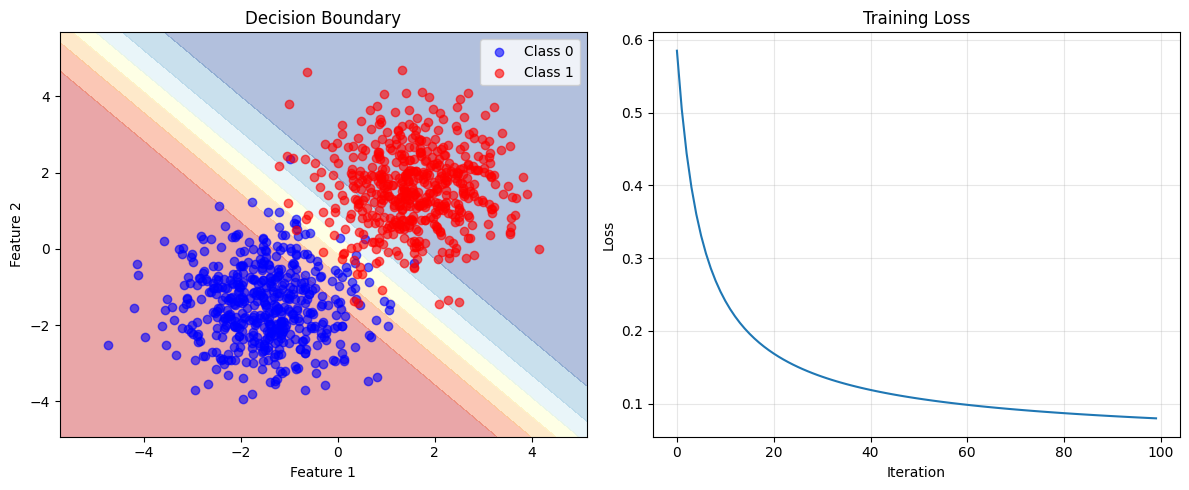



Final weights: [1.26569392 1.19030386]
Final bias: -0.030234764812459597




In [37]:
# Create synthetic dataset for binary classification
np.random.seed(42)  # For reproducibility
n_samples = 1000
n_features = 2

# Generating 2 classes with diff centers
X_class0 = np.random.randn(n_samples//2, n_features) - 1.5  # Centered at (-1.5, -1.5)
X_class1 = np.random.randn(n_samples//2, n_features) + 1.5  # Centered at (1.5, 1.5)

X = np.vstack([X_class0, X_class1]) # Vertical stack
print( "Vertical Stack: ", X[:5], "\n...", X[-5:])

y = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])  # Labels: 0s then 1s
print( "Horizontal Stack: ", y[:5], "...", y[-5:])


# Shuffle data to mix classes
indices = np.random.permutation(n_samples)
X, y = X[indices], y[indices]

print( "X: ", X[:5], "...", X[-5:])
print( "y: ", y[:5], "...", y[-5:])


# Train model
model = LogisticRegressionWithGD(n_features=2, learning_rate=.1)

# Training
n_epochs = 100
for epoch in range(n_epochs):
  loss = model.train_step(X, y)

  if epoch % 10 == 0:
    print(f"\n\nEpoch {epoch}, Loss: {loss:.4f}")
    print(f"Current weights: {model.w}")
    print(f"Current bias: {model.b}\n\n")

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot decision boundary
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax1.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
ax1.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Class 0', alpha=0.6)
ax1.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Class 1', alpha=0.6)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('Decision Boundary')
ax1.legend()

# Plot loss curve
ax2.plot(model.losses)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Loss')
ax2.set_title('Training Loss')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n\nFinal weights: {model.w}")
print(f"Final bias: {model.b}\n\n")

## Mini-batch Gradient Descent

In [38]:
def create_mini_batches(X,y, batch_size):
  """Mini batches for training"""

  m=len(y)
  mini_batches = []

  # Shuffling
  indices = np.random.permutation(m)
  print("indices: ", str(indices[5]))

  X_shuffled = X[indices]
  y_shuffled = y[indices]


  # Creating mini batches with the batch_size as limit
  for i in range(0, m, batch_size):
    X_batch = X_shuffled[i:i+batch_size]
    y_batch = y_shuffled[i:i+batch_size]

    mini_batches.append((X_batch, y_batch))

  # print(type(mini_batches))
  return(mini_batches)


In [39]:

indices_sample = np.random.permutation(20)
X_sample, y_sample = X[indices_sample], y[indices_sample]

mini_batches = create_mini_batches(X_sample,y_sample,5)
mini_batches

indices:  1


[(array([[-0.49373564,  1.87405657],
         [-3.01519106, -0.13312573],
         [-0.8858333 , -0.74249229],
         [ 0.49345743,  2.63987856],
         [-2.42323325, -2.85168461]]),
  array([1., 0., 0., 1., 0.])),
 (array([[2.57600714, 1.52131165],
         [0.69632543, 3.13911681],
         [2.52406253, 2.09252695],
         [2.41922893, 0.83185591],
         [2.19822331, 1.89348539]]),
  array([1., 1., 1., 1., 1.])),
 (array([[ 3.16125921,  1.04290374],
         [ 1.74075318,  4.10168311],
         [-2.25635075, -2.92225371],
         [-1.94643361, -1.30591001],
         [ 1.56447441, -0.47546657]]),
  array([1., 1., 0., 0., 1.])),
 (array([[-1.25503343, -2.00694318],
         [ 0.91831909,  0.48524327],
         [-3.10748323, -1.31536614],
         [-3.27872025, -0.00395569],
         [ 2.02112243,  2.14521559]]),
  array([0., 1., 0., 0., 1.]))]

Streaming output truncated to the last 5000 lines.
dw: [-2.90219956e-06 -1.19171924e-06] db:  -9.697633048810772e-07
dw: [-0.00222722 -0.00057461] db:  0.0014484740537871938
dw: [-9.09263998e-05 -1.33325488e-04] db:  -7.139763858721171e-05
dw: [-0.00036193 -0.00077901] db:  -0.00043789583367004337
dw: [-7.29775888e-06 -1.55825819e-05] db:  5.67518731771079e-06
dw: [-0.01482855  0.00284899] db:  0.009672095782525729
dw: [-1.62202034e-07 -1.67795085e-07] db:  6.223376330088236e-08
dw: [-2.94668291e-07 -5.26783892e-07] db:  -1.5780554418753923e-07
dw: [-1.90492159e-06 -1.70925377e-06] db:  8.141658353030671e-07
dw: [-0.00229382 -0.00018342] db:  -0.0012789206069963033
dw: [ 0.03809659 -0.12007412] db:  0.08197660230951449
dw: [-0.00276205 -0.00330735] db:  -0.003254901086874651
dw: [-2.04463160e-07 -2.21447618e-07] db:  8.158888347683868e-08
dw: [-0.00025078 -0.00094771] db:  0.0004563110023466774
dw: [-1.95182567e-06 -6.65553889e-07] db:  -6.048489421539571e-07
dw: [-1.02688047e-05 -4.35

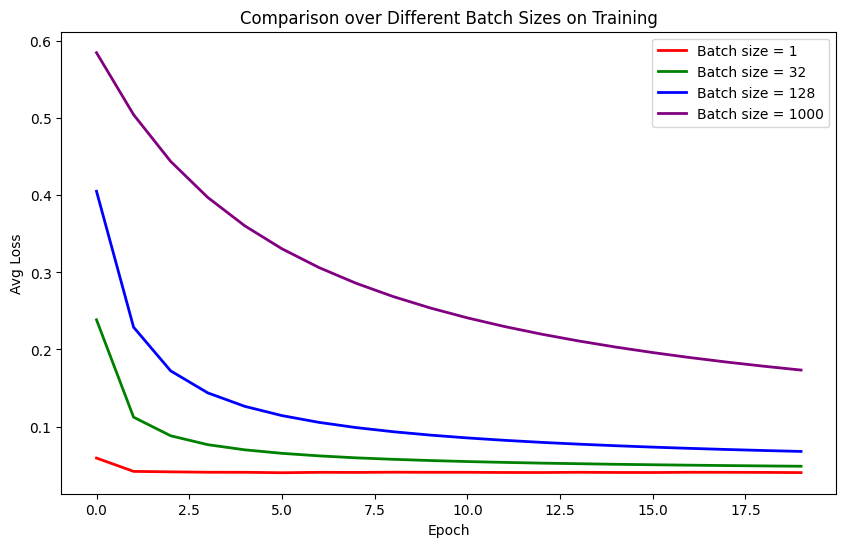

In [40]:
# Comparing diff batch sizes
batch_sizes = [1,32,128,1000]  # 1 = SGD, 1000 = full batch
colors = ['red', 'green', 'blue', 'purple']

plt.figure(figsize=(10,6))

for batch_size, color in zip(batch_sizes, colors):
  model = LogisticRegressionWithGD(n_features=2, learning_rate=.1)
  losses = []


  for epoch in range(20):
    mini_batches = create_mini_batches(X,y,batch_size)
    epoch_loss = 0

    for X_batch, y_batch in mini_batches:
      loss = model.train_step(X_batch, y_batch)
      epoch_loss += loss * len(y_batch) # Weight by batch size

    avg_loss = epoch_loss / len(y) # Average over all the examples size
    losses.append(avg_loss)

  plt.plot(losses, label=f"Batch size = {batch_size}", color=color, linewidth=2)

plt.xlabel("Epoch")
plt.ylabel("Avg Loss")
plt.title("Comparison over Different Batch Sizes on Training")
plt.legend()
plt.show()

#### The batch size comparison shows mini-batch gradient descent with batch size 32 achieving optimal performance, converging rapidly to the lowest final loss (aprox 0.04) with smooth training dynamics. SGD (batch=1) exhibits fastest initial descent but plateaus at higher loss (aprox 0.05) due to gradient noise. Batch size 128 follows similar convergence pattern to batch 32 with slightly slower speed. Full batch gradient descent (batch=1000) demonstrates poorest performance, starting at highest initial loss (aprox 0.58) and remaining at aprox 0.17 after 20 epochs, indicating suboptimal learning rate for large batch updates and insufficient training duration. The experiment illustrates that moderate batch sizes outperform extremes by balancing gradient accuracy with update frequency. Batch size 32 provides optimal trade-off between convergence speed and final performance. Results confirm that mini-batch gradient descent often superior to both stochastic and full batch methods in practical applications.

# L2 Regularization: Ridge


In [45]:
class LogisticRegressionL2:
  def __init__(self, n_features, learning_rate=0.1, alpha=0.01):
    self.w = np.zeros(n_features)
    self.b = 0
    self.learning_rate = learning_rate
    self.alpha = alpha

  def compute_loss_with_regularization(self, X, y):
    m = len(y)
    y_pred = sigmoid( np.dot(X, self.w) + self.b  )

    # Cross-Entropy Loss
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1-epsilon) # y_pred clipped to avoid log(o) errors
    ce_loss = (-1/m) * np.sum( ( y * np.log(y_pred))   + ( (1-y) * np.log(1-y_pred) ) )

    # L2 regularization term: (α/2m) * Σw²
    l2_term = (self.alpha/(2*m)) * np.sum((self.w ** 2)) # Does not regularize bias


    return ce_loss + l2_term

  def train_step(self, X,y):
    """ Gradient descent with L2 regularization"""

    m = len(y)
    y_pred = sigmoid((np.dot(X, self.w)) + self.b)

    # Gradient with reg.
    # dw has extra term: (α/m) * w
    dw = (1/m) * np.dot((y_pred - y), X) + (self.alpha/m) * self.w
    db = np.sum(y_pred - y) # Bias is not regularized


    # Update params
    self.w -= self.learning_rate * dw
    self.b -= self.learning_rate * db


Alpha=0, Iter=0, Loss=0.6931
Alpha=0, Iter=100, Loss=0.6769
Alpha=0, Iter=200, Loss=0.6620
Alpha=0, Iter=300, Loss=0.6479
Alpha=0, Iter=400, Loss=0.6346
Alpha=0, Iter=500, Loss=0.6221
Alpha=0, Iter=600, Loss=0.6102
Alpha=0, Iter=700, Loss=0.5989
Alpha=0, Iter=800, Loss=0.5882
Alpha=0, Iter=900, Loss=0.5781
Alpha=0, Iter=1000, Loss=0.5685
Alpha=0, Iter=1100, Loss=0.5594
Alpha=0, Iter=1200, Loss=0.5507
Alpha=0, Iter=1300, Loss=0.5424
Alpha=0, Iter=1400, Loss=0.5345
Alpha=0, Iter=1500, Loss=0.5269
Alpha=0, Iter=1600, Loss=0.5197
Alpha=0, Iter=1700, Loss=0.5128
Alpha=0, Iter=1800, Loss=0.5061
Alpha=0, Iter=1900, Loss=0.4998
Alpha=0.01, Iter=0, Loss=0.6931
Alpha=0.01, Iter=100, Loss=0.6769
Alpha=0.01, Iter=200, Loss=0.6620
Alpha=0.01, Iter=300, Loss=0.6479
Alpha=0.01, Iter=400, Loss=0.6346
Alpha=0.01, Iter=500, Loss=0.6221
Alpha=0.01, Iter=600, Loss=0.6102
Alpha=0.01, Iter=700, Loss=0.5989
Alpha=0.01, Iter=800, Loss=0.5882
Alpha=0.01, Iter=900, Loss=0.5781
Alpha=0.01, Iter=1000, Loss=0.5685

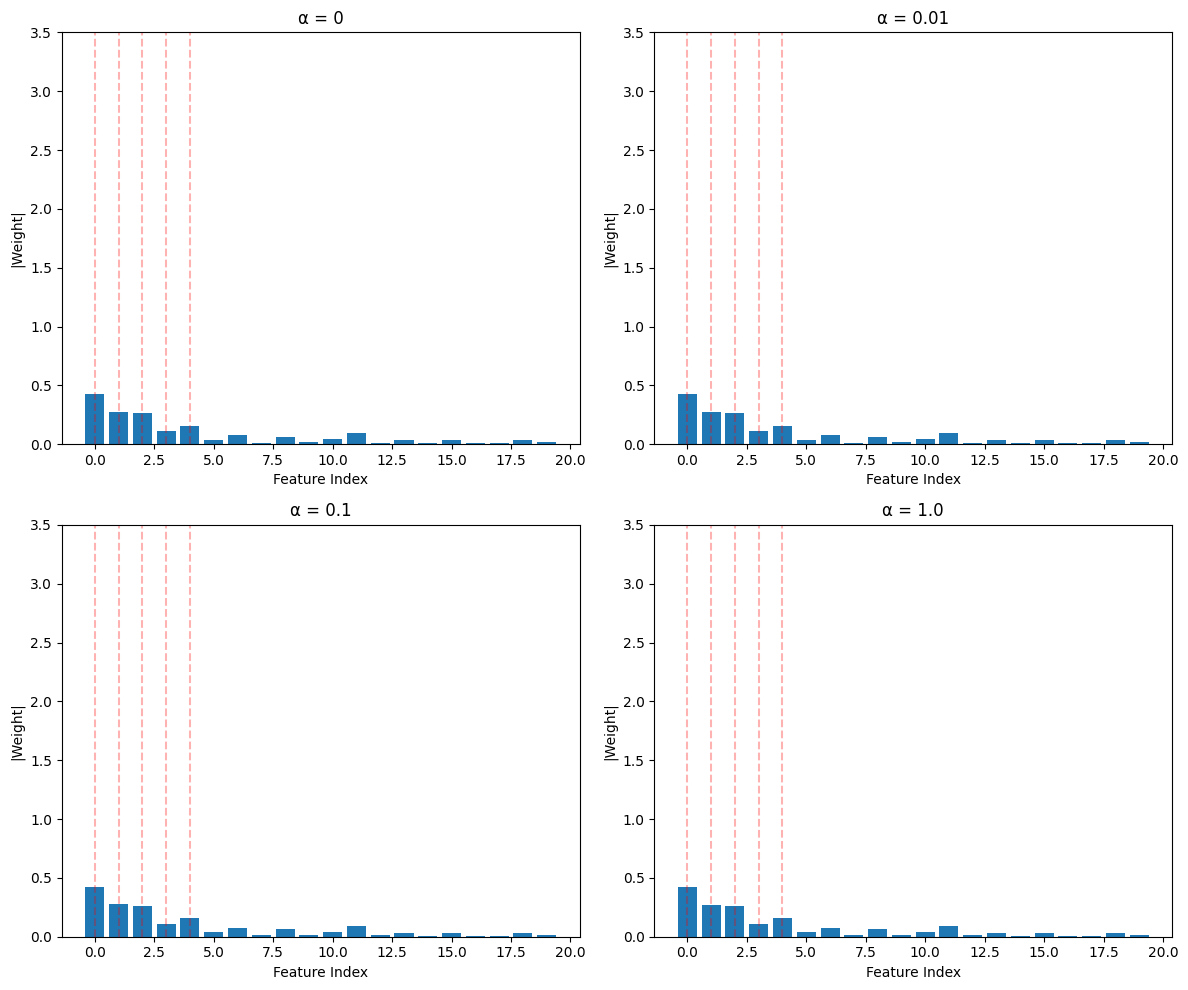


α = 0:
  Sum of squared weights: 0.3889
  Number of 'small' weights (|w| < 0.1): 15

α = 0.01:
  Sum of squared weights: 0.3889
  Number of 'small' weights (|w| < 0.1): 15

α = 0.1:
  Sum of squared weights: 0.3886
  Number of 'small' weights (|w| < 0.1): 15

α = 1.0:
  Sum of squared weights: 0.3853
  Number of 'small' weights (|w| < 0.1): 15


In [63]:
# Generate data set
np.random.seed(42)
n_samples = 200
n_features = 20 # Using many feature for regularization effect

# Generate data, only 5 features matter
X = np.random.randn(n_samples, n_features)
true_weights = np.zeros(n_features)
true_weights[:5] = np.array([3, -2, 1.5, -1, .5]) # Only 5 features have non-zero weights

# Adding noise to make classif imperfect
y = (sigmoid(np.dot(X, true_weights) +np.random.randn(n_samples) * .1 ) > .5 ).astype(int)

# Train models with idff regularization strengths
alphas = [0, .01, 0.1, 1.0] # No reg, light reg, medium reg, heavy regularization
models = []


# Modified training loop that uses compute_loss_with_regularization
for alpha in alphas:
  model = LogisticRegressionL2(n_features, learning_rate=0.001, alpha=alpha)
  losses = []  # Track losses

  # Train for 2000 iterations
  for iteration in range(2000):
    # Compute and store loss before update
    loss = model.compute_loss_with_regularization(X, y)
    losses.append(loss)

    # Perform gradient update
    model.train_step(X, y)

    # Optionally print progress
    if iteration % 100 == 0:
      print(f"Alpha={alpha}, Iter={iteration}, Loss={loss:.4f}")


  models.append(model)



# Visualize weight magnitudes
fig, axes = plt.subplots(2,2, figsize=(12,10))
axes = axes.ravel() #Flatten 2x2 array into 1dim for indexing

for i, (alpha,model) in enumerate(zip(alphas,models)):
  axes[i].bar(range(n_features), np.abs(model.w))  # Plot absolute weight values
  axes[i].set_xlabel('Feature Index')
  axes[i].set_ylabel('|Weight|')
  axes[i].set_title(f'α = {alpha}')
  axes[i].set_ylim(0, 3.5)  # Same scale for comparison

  # Important features go red
  for j in range(5):
    axes[i].axvline(x=j, color='red', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Print weight statistics
for alpha, model in zip(alphas, models):
  print(f"\nα = {alpha}:")
  print(f"  Sum of squared weights: {np.sum(model.w**2):.4f}")
  print(f"  Number of 'small' weights (|w| < 0.1): {np.sum(np.abs(model.w) < 0.1)}")

#### With learning rate 0.001, the L2 regularization results demonstrate expected behavior for logistic regression. Sum of squared weights remains reasonable around 0.39 across all regularization strengths, decreasing slightly from 0.3889 (α=0) to 0.3853 (α=1.0). The model consistently identifies exactly 15 weights as small (|w| < 0.1), correctly distinguishing the 15 irrelevant features from the 5 true predictive features in the synthetic dataset. This stability across regularization parameters indicates proper convergence and successful feature identification. The modest decrease in weight magnitudes with increasing α reflects appropriate L2 regularization behavior - providing weight shrinkage without forcing weights to zero. The lower learning rate enables convergence to optimal weights where the sparse structure of the true model is preserved regardless of regularization strength. These results confirm the implementation correctly balances fitting the data with regularization constraints, achieving both accurate classification and appropriate weight penalization.

##Integrated Example: Complete Text Classification System